In [1]:
import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split
# load the iris dataset
iris = datasets.load_iris()

   
# Split data 70%-30% into training set and test set
x_train, x_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.30, random_state=42)

In [2]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(105, 4)
(45, 4)
(105,)
(45,)


In [3]:
# import the packages
import torch
import torch.nn as nn
import torch.utils.data as utils
import torch.utils.data as td
import torch.nn.functional as F

In [4]:
# create a new dataset and loader for both train and test data
# train data
train_X = torch.Tensor(x_train).float()
train_Y = torch.Tensor(y_train).long()
ds_train = utils.TensorDataset(train_X,train_Y)
train_loader = td.DataLoader(ds_train, batch_size=10,
    shuffle=False, num_workers=1)

In [5]:
# test data
test_X = torch.Tensor(x_test).float()
test_Y = torch.Tensor(y_test).long()
ds_test = utils.TensorDataset(test_X,test_Y)
test_loader = td.DataLoader(ds_test, batch_size=10,
    shuffle=False, num_workers=1)

In [6]:
# Define the neural network
class NeuralNet(nn.Module):
    def __init__(self):
        super(NeuralNet, self).__init__()
        self.fc1 = nn.Linear(4, 8)
        self.fc2 = nn.Linear(8, 8)
        self.fc3 = nn.Linear(8, 3)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = torch.softmax(self.fc3(x),dim=1)
        return x

# Create a model instance from the network
model = NeuralNet()
print(model)

NeuralNet(
  (fc1): Linear(in_features=4, out_features=8, bias=True)
  (fc2): Linear(in_features=8, out_features=8, bias=True)
  (fc3): Linear(in_features=8, out_features=3, bias=True)
)


In [7]:
# train the model
def train(model, data_loader, optimizer):
    # Set the model to training mode
    model.train()
    train_loss = 0
    
    for i, j in enumerate(data_loader):
        data, target = j
        #feedforward
        optimizer.zero_grad()
        out = model(data)
        loss = criterion(out, target)
        train_loss += loss.item()

        # backpropagate
        loss.backward()
        optimizer.step()

    #Return loss
    avg_loss = train_loss / len(data_loader.dataset)
    return avg_loss

In [8]:
#test the model
def test(model, data_loader):
    # Switch the model to evaluation mode (so we don't backpropagate)
    model.eval()
    test_loss = 0
    correct = 0

    with torch.no_grad():
        for i, j in enumerate(data_loader):
            data, target = j
            # Get the predictions
            out = model(data)

            # calculate the loss
            test_loss += criterion(out, target).item()

            # Calculate the accuracy
            _, predicted = torch.max(out.data, 1)
            correct += torch.sum(target==predicted).item()
            
    # return validation loss and prediction accuracy for the epoch
    avg_accuracy = correct / len(data_loader.dataset)
    avg_loss = test_loss / len(data_loader.dataset)
    return avg_loss, avg_accuracy

In [9]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9)

In [10]:
epoch_num = []
training_loss = []
validation_loss = []

# Train over 100 epochs
epochs = 100
for epoch in range(0, epochs):
    
    # Feed the training data into the model to optimize the weights
    train_loss = train(model, train_loader, optimizer)
    
    # Feed the test data into the model to check its performance
    test_loss, accuracy = test(model, test_loader)
    
    # Log the metrcs for this epoch
    epoch_num.append(epoch)
    training_loss.append(train_loss)
    validation_loss.append(test_loss)
    
    # Print stats for every 10th epoch so we can see training progress
    if (epoch) % 10 == 0:
        print('Epoch {:d}: Training loss= {:.4f}, Validation loss= {:.4f}, Accuracy={:.4%}'.format(epoch, train_loss, test_loss, accuracy))

Epoch 0: Training loss= 0.1151, Validation loss= 0.1186, Accuracy=42.2222%
Epoch 10: Training loss= 0.0834, Validation loss= 0.0827, Accuracy=88.8889%
Epoch 20: Training loss= 0.0715, Validation loss= 0.0727, Accuracy=91.1111%
Epoch 30: Training loss= 0.0663, Validation loss= 0.0663, Accuracy=97.7778%
Epoch 40: Training loss= 0.0650, Validation loss= 0.0648, Accuracy=97.7778%
Epoch 50: Training loss= 0.0644, Validation loss= 0.0641, Accuracy=97.7778%
Epoch 60: Training loss= 0.0639, Validation loss= 0.0637, Accuracy=97.7778%
Epoch 70: Training loss= 0.0636, Validation loss= 0.0635, Accuracy=97.7778%
Epoch 80: Training loss= 0.0633, Validation loss= 0.0635, Accuracy=97.7778%
Epoch 90: Training loss= 0.0631, Validation loss= 0.0638, Accuracy=97.7778%


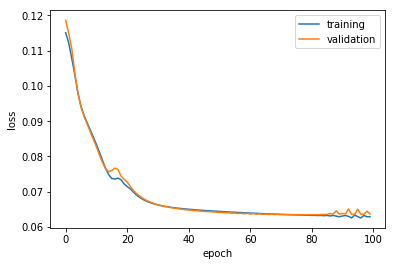

In [12]:
import matplotlib.pyplot as plt
plt.plot(epoch_num, training_loss)
plt.plot(epoch_num, validation_loss)
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['training', 'validation'], loc='upper right')
plt.show()

In [13]:
# Set the model to evaluate mode
model.eval()

# Get predictions for the test data
x = torch.Tensor(x_test).float()
_, predicted = torch.max(model(x).data, 1)
print(predicted)

tensor([1, 0, 2, 1, 1, 0, 1, 2, 2, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2, 0, 2,
        2, 2, 2, 2, 0, 0, 0, 0, 1, 0, 0, 2, 1, 0, 0, 0, 2, 1, 1, 0, 0])


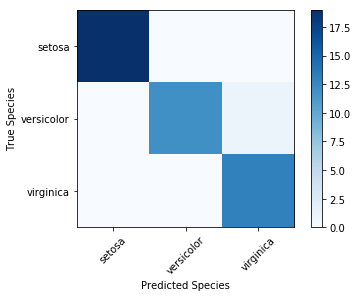

In [14]:
#Plot the confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, predicted.numpy())
plt.imshow(cm, interpolation="nearest", cmap=plt.cm.Blues)
plt.colorbar()
tick_marks = np.arange(len(iris.target_names))
plt.xticks(tick_marks, iris.target_names, rotation=45)
plt.yticks(tick_marks, iris.target_names)
plt.xlabel("Predicted Species")
plt.ylabel("True Species")
plt.show()

In [15]:
# Prediction with new data
x_new = [[5.6,2.2,4.8,1.4]]
print ('New sample: {}'.format(x_new[0]))

model.eval()

# Get a prediction for the new data sample
x = torch.Tensor(x_new).float()
_, predicted = torch.max(model(x).data, 1)

print('Prediction:',iris.target_names[predicted.item()])

New sample: [5.6, 2.2, 4.8, 1.4]
Prediction: virginica
